# Car Price Prediction: Multiple Linear Regression

## Objective
* Importing appropriate libaries needed for constructing linear regression and visualization
* Data Wrangling: 
    * Dealing with missing values, corresponding to different data types
    * Changing data types, if needed
* Exploratory Data Analysis (EDA)
    * Evaluating relationship with visualization (e.g., regression plot, residual plot)
    * Using the correct statistics (e.g., Pearson correlation)
    * Exploration of variety statistical tests (e.g., ANOVA)
* Model Development & Refinement
    * Applying appropriate transformations for polynomial regression
    * Constructing a more overfitting-free model with Ridge regression and GridSearchCV

## Table of Contents


## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# defining a function to display dataframes horizontally

def horizontal(dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 32px">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

print('loaded')

loaded


## Import the dataset

In [2]:
filepath = 'data/CarPrice_Assignment.csv'

df = pd.read_csv(filepath)

df_dummy = df.copy() # copy of df

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exploring the Variables

Let us first remove the first column, `car_ID`, because this variable is only used for identifying each vehicle.

In [4]:
# removing the first column because it is irrelevant
df = df.drop('car_ID', axis=1)

In [5]:
for column in list(df.columns):
    print(f"The number of missing values in {column}: {df[column].isna().sum()}")

The number of missing values in symboling: 0
The number of missing values in CarName: 0
The number of missing values in fueltype: 0
The number of missing values in aspiration: 0
The number of missing values in doornumber: 0
The number of missing values in carbody: 0
The number of missing values in drivewheel: 0
The number of missing values in enginelocation: 0
The number of missing values in wheelbase: 0
The number of missing values in carlength: 0
The number of missing values in carwidth: 0
The number of missing values in carheight: 0
The number of missing values in curbweight: 0
The number of missing values in enginetype: 0
The number of missing values in cylindernumber: 0
The number of missing values in enginesize: 0
The number of missing values in fuelsystem: 0
The number of missing values in boreratio: 0
The number of missing values in stroke: 0
The number of missing values in compressionratio: 0
The number of missing values in horsepower: 0
The number of missing values in peakrpm

In [6]:
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

We can see that there are no missing values in this dataset.

## Exploratory Data Analysis

In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Summary of the categorical variables
categorical = df.dtypes[df.dtypes == 'object'].index

df[categorical].describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [10]:
df.shape

(205, 25)

### Categorical Variables

Examining the categorical variables in the dataset, `fueltype` ~ `fuelsystem` seem to provide information about the vehicles. On the other hand, `CarName` has 147 unique values while the number of element is 205. This categorical variable has almost as many levels as there are records. This implies that this variable may not be suitable for the predictive model in the future.
However, we will take a closer look at `CarName`.

In [11]:
df['CarName'][:15]

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
Name: CarName, dtype: object

In [12]:
df['CarName'].describe()

count               205
unique              147
top       toyota corona
freq                  6
Name: CarName, dtype: object

It appears that every car name has a brand, followed by the name of the vehicle. We can split the car name and group it by brands.

In [13]:
char_carName = df['CarName'].astype(str)

new_carName = np.array([name.split(' ')[0] for name in char_carName])

new_carName = pd.Categorical(new_carName)

new_carName.describe()

,counts,freqs
categories,,
Nissan,1,0.004878
alfa-romero,3,0.014634
audi,7,0.034146
bmw,8,0.039024
buick,8,0.039024
chevrolet,3,0.014634
dodge,9,0.043902
honda,13,0.063415
isuzu,4,0.019512


In [14]:
df['CarName'] = new_carName

We notice similar brand names such as `toyota` and `toyouta`. We can easily conjecture that this is due to typographical errors. Thus, we must correct the following brands:
* `maxda` -> `mazda`
* `Nissan` -> `nissan`
* `porcshce` -> `porsche`
* `toyouta` -> `toyota`
* `vokswagen` -> `volkswagen`
* `vw` -> `volkswagen`

In [15]:
spelling_correction = {
    'maxda': 'mazda', 
    'Nissan': 'nissan', 
    'porcshce': 'porsche', 
    'toyouta': 'toyota', 
    'vokswagen': 'volkswagen', 
    'vw': 'volkswagen'
    }

df['CarName'].replace(spelling_correction, inplace=True)

a = df['CarName'].describe().to_frame()
b = df['CarName'].value_counts().to_frame()

horizontal([a,b, new_carName.value_counts().to_frame()])

,CarName
count,205
unique,22
top,toyota
freq,32
,count
CarName,
toyota,32
nissan,18
mazda,17
mitsubishi,13


We now have grouped the car names and modified them so that they have consistent names. Most frequent car brand is `toyota` with 32 vehicles. Let us also take a look at the average price for each brand.

In [16]:
df[['CarName', 'price']].groupby('CarName').agg(['count', 'mean','min','max'])

/var/folders/j9/99gn8v5n6vd9nfrxk4qd8cdw0000gn/T/ipykernel_86432/3740868802.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['CarName', 'price']].groupby('CarName').agg(['count', 'mean','min','max'])


price                                
            count          mean      min      max
CarName                                          
alfa-romero     3  15498.333333  13495.0  16500.0
audi            7  17859.166714  13950.0  23875.0
bmw             8  26118.750000  16430.0  41315.0
buick           8  33647.000000  25552.0  45400.0
chevrolet       3   6007.000000   5151.0   6575.0
dodge           9   7875.444444   5572.0  12964.0
honda          13   8184.692308   5399.0  12945.0
isuzu           4   8916.500000   6785.0  11048.0
jaguar          3  34600.000000  32250.0  36000.0
mazda          17  10652.882353   5195.0  18344.0
mercury         1  16503.000000  16503.0  16503.0
mitsubishi     13   9239.769231   5389.0  14869.0
nissan         18  10415.666667   5499.0  19699.0
peugeot        11  15489.090909  11900.0  18150.0
plymouth        7   7963.428571   5572.0  12764.0
porsche         5  31400.500000  22018.0  37028.0
renault         2   9595.000000   9295.0   9895.0
saab            6  15223.333333  11850.0  18620.0
subaru         12   8541.250000   5118.0  11694.0
toyota         32   9885.812500   5348.0  17669.0
volkswagen     12  10077.500000   7775.0  13845.0
volvo          11  18063.181818  12940.0  22625.0

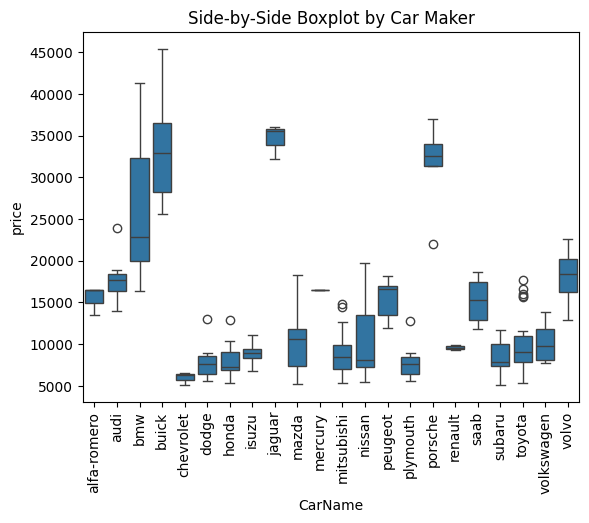

In [17]:
sns.boxplot(x='CarName', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Side-by-Side Boxplot by Car Maker")
plt.show()

We see a very vague association between `CarName` and `price`. We can include this variable in our linear regression model, but we will also take a look at the version without this variable and compare. 

Let us first observe the car price, grouped by each categorical variable
* `fueltype`
* `aspiration`
* `doornumber`
* `carbody`
* `drivewheel`
* `enginelocation`
* `enginetype`
* `cylindernumber`
* `fuelsystem`

In [18]:
# Selecting number and object columns
num_only_df = df.select_dtypes(include=np.number)
obj_only_df = df.select_dtypes(include='object')

In [19]:
df_list = []
for column in list(obj_only_df.columns):
    df_list.append(df[[column,'price']].groupby(column).agg(['mean', 'max','min', 'count']))

horizontal(df_list)

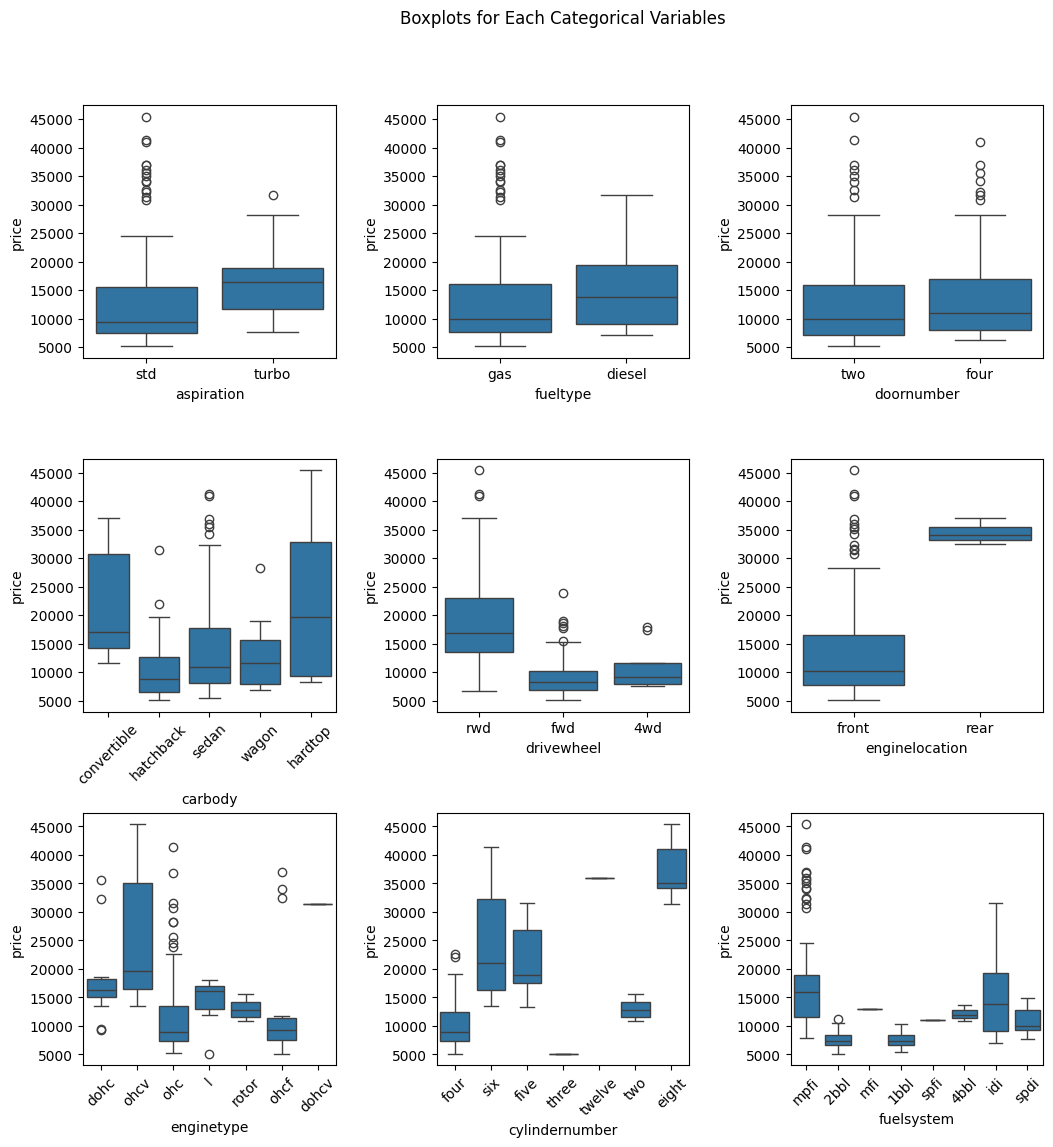

In [20]:
fig, ax = plt.subplots(3,3, figsize=(12,12))
fig.suptitle('Boxplots for Each Categorical Variables')

sns.boxplot(data=df, x='aspiration', y='price', ax=ax[0,0])
sns.boxplot(data=df, x='fueltype', y='price', ax=ax[0,1])
sns.boxplot(data=df, x='doornumber', y='price', ax=ax[0,2])
sns.boxplot(data=df, x='carbody', y='price', ax=ax[1,0])
sns.boxplot(data=df, x='drivewheel', y='price', ax=ax[1,1])
sns.boxplot(data=df, x='enginelocation', y='price', ax=ax[1,2])
sns.boxplot(data=df, x='enginetype', y='price', ax=ax[2,0])
sns.boxplot(data=df, x='cylindernumber', y='price', ax=ax[2,1])
sns.boxplot(data=df, x='fuelsystem', y='price', ax=ax[2,2])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
ax[1,0].tick_params(axis='x',labelrotation=45)
ax[2,0].tick_params(axis='x',labelrotation=45)
ax[2,1].tick_params(axis='x',labelrotation=45)
ax[2,2].tick_params(axis='x',labelrotation=45)
plt.show()

We will include the variables with a strong association between `price` and itself. It is indicated by how much they are overlapping in the plots above. T-tests will be used to assess the association if the overlapping seems to be vague.

Variables chosen from the evaluating the visualizations:
* `drivewheel`
* `enginelocation`
* `cylindernumber`

Variables by which t-tests needs to be conducted:
* `aspiration`
* `fueltype`
* `doornumber`
* `carbody`
* `enginetype`
* `fuelsystem`

T-tests for binary variables, and ANOVA will be used for varialbes with more than 2 groups.

First, let us check that the data follow the normal distribution and they should have the equal variances.

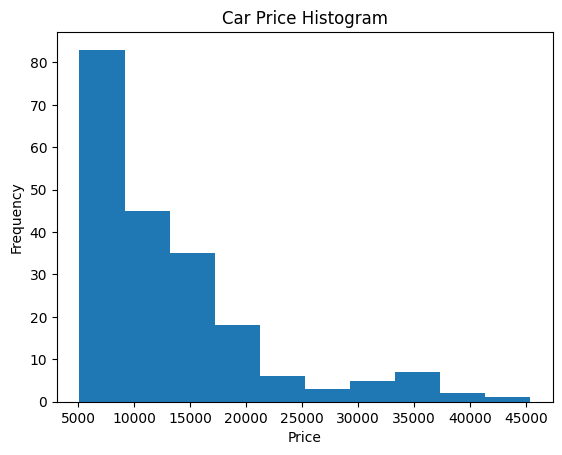

In [21]:
plt.hist(df['price'])
plt.title("Car Price Histogram")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

We see that the `price` variable is not normally distributed to begin with, and the sample size is very small. Thus we cannot conduct t-tests nor ANOVA, which requires to have normality in our data. 

We will use Mann-Whitney U test for binary variables and Kruskal Wallis Test for variables with multiple categories.

#### Mann-Whitney U Test

* Null Hypothesis ($H_0$): In the two samples, the rank sums do not differ significantly.
* Alternative Hypothesis ($H_1$): In the two samples, the rank sums do differ significantly.

In [22]:
from scipy.stats import mannwhitneyu

def printUTestResult(x1, x2, str):
    mwu, p_value = mannwhitneyu(x1, x2)

    print(f"{str}: \nStatistics: {mwu}, P-value: {p_value}")
    if p_value < 0.05:
        print("Reject the null hypothesis; there is a significant difference between the rank sums of the two samples\n")
    else:
        print("Do not reject the null hypothesis; there is no significant difference between the rank sums of the two samples\n")


aspiration1 = df[df['aspiration'] == 'std']['price']
aspiration2 = df[df['aspiration'] == 'turbo']['price']

fueltype1 = df[df['fueltype'] == 'gas']['price']
fueltype2 = df[df['fueltype'] == 'diesel']['price']

doornumber1 = df[df['doornumber'] == 'two']['price']
doornumber2 = df[df['doornumber'] == 'four']['price']


printUTestResult(aspiration1, aspiration2, 'aspiration')
printUTestResult(fueltype1, fueltype2, 'fueltype')
printUTestResult(doornumber1, doornumber2, 'doornumber')

aspiration: 
Statistics: 1666.5, P-value: 1.027454898989684e-05
Reject the null hypothesis; there is a significant difference between the rank sums of the two samples

fueltype: 
Statistics: 1347.0, P-value: 0.04616736846226526
Reject the null hypothesis; there is a significant difference between the rank sums of the two samples

doornumber: 
Statistics: 4462.0, P-value: 0.09096288374664191
Do not reject the null hypothesis; there is no significant difference between the rank sums of the two samples



#### Kruskal-Wallis Test

* Null Hypothesis ($H_0$): In the multiple samples, the median do not differ significantly
* Alternate Hypothesis ($H_1$): In the multiple samples, the median do differ significantly

In [23]:
from scipy.stats import kruskal

def printHTestResult(str, *samples):

    # Performing the Kruskal-Wallis H-Test
    h_statistic, p_value = kruskal(*samples)

    # Calculating the degree of freedom
    k = len(df[str].unique())
    degree = k - 1

    print(f"{str}: \nH-Statistics: {h_statistic}, P-value: {p_value}, Degree of Freedom: {degree}")
    if p_value < 0.05:
        print("Reject the null hypothesis; there is a significant difference between the rank sums of the two samples\n")
    else:
        print("Do not reject the null hypothesis; there is no significant difference between the rank sums of the two samples\n")

# Separating the data for each sample
carbody1 = df[df['carbody'] == 'convertible']['price']
carbody2 = df[df['carbody'] == 'hatchback']['price']
carbody3 = df[df['carbody'] == 'sedan']['price']
carbody4 = df[df['carbody'] == 'wagon']['price']
carbody5 = df[df['carbody'] == 'hardtop']['price']

enginetype1 = df[df['enginetype'] == 'dohc']['price']
enginetype2 = df[df['enginetype'] == 'ohcv']['price']
enginetype3 = df[df['enginetype'] == 'ohc']['price']
enginetype4 = df[df['enginetype'] == 'l']['price']
enginetype5 = df[df['enginetype'] == 'rotor']['price']
enginetype6 = df[df['enginetype'] == 'ohcf']['price']
enginetype7 = df[df['enginetype'] == 'dohcv']['price']

fuelsystem1 = df[df['fuelsystem'] == 'mpfi']['price']
fuelsystem2 = df[df['fuelsystem'] == '2bbl']['price']
fuelsystem3 = df[df['fuelsystem'] == 'mfi']['price']
fuelsystem4 = df[df['fuelsystem'] == '1bbl']['price']
fuelsystem5 = df[df['fuelsystem'] == 'spfi']['price']
fuelsystem6 = df[df['fuelsystem'] == '4bbl']['price']
fuelsystem7 = df[df['fuelsystem'] == 'idi']['price']
fuelsystem8 = df[df['fuelsystem'] == 'spdi']['price']


printHTestResult("carbody", carbody1, carbody2, carbody3, carbody4, carbody5)
printHTestResult("enginetype", enginetype1, enginetype2, enginetype3, enginetype4, enginetype5, enginetype6, enginetype7)
printHTestResult("fuelsystem", fuelsystem1, fuelsystem2, fuelsystem3, fuelsystem4, fuelsystem5, fuelsystem6, fuelsystem7, fuelsystem8)


carbody: 
H-Statistics: 22.183437941390444, P-value: 0.0001842534808688567, Degree of Freedom: 4
Reject the null hypothesis; there is a significant difference between the rank sums of the two samples

enginetype: 
H-Statistics: 40.133921438590676, P-value: 4.287270740376635e-07, Degree of Freedom: 6
Reject the null hypothesis; there is a significant difference between the rank sums of the two samples

fuelsystem: 
H-Statistics: 125.0821070976894, P-value: 6.683871002354369e-24, Degree of Freedom: 7
Reject the null hypothesis; there is a significant difference between the rank sums of the two samples



According to the Mann-Whitney U Test, we see that `aspiration` and `fueltype` have significant differences between the rank sums of the two samples, while `doornumber` does not seem to have any significant difference between the rank sums of the two samples. Therefore, we will include `aspiration` and `fueltype` and exclude `doornumber` in our predictive model. Also according to the Kruskal-Wallis H-Test, we see that `carbody`, `enginetype`, and `fuelsystem` all have significant differences between the rank sums of the multiple samples. Therefore, we will include these variables in our predictive model as well.

### Numerical Variable

#### Linearity

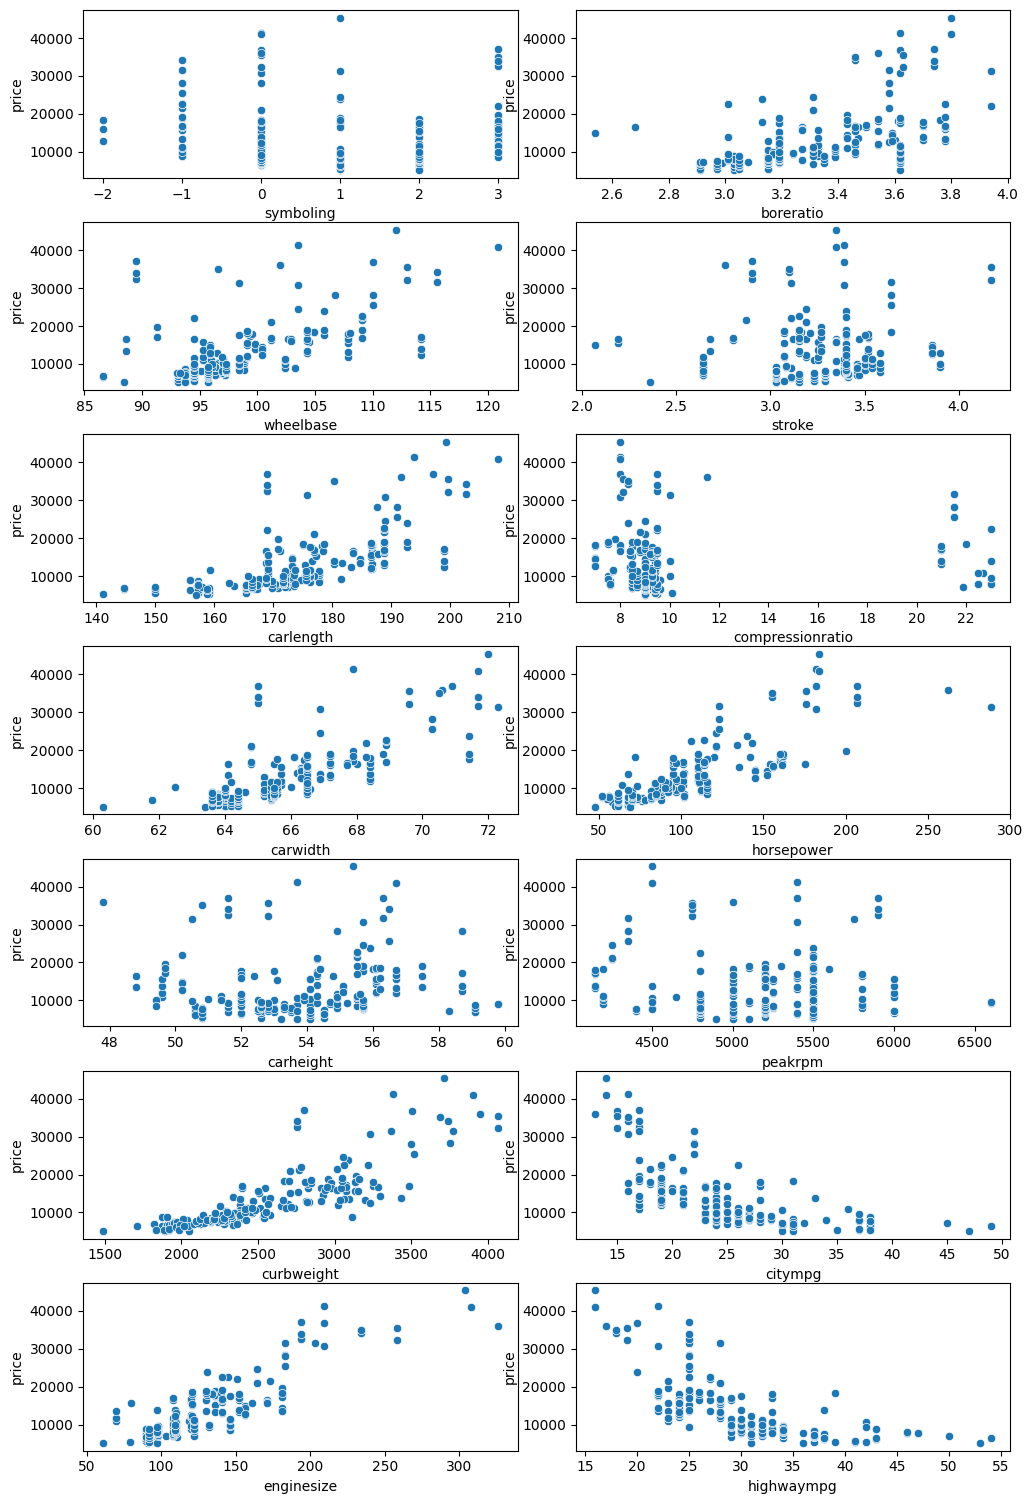

In [58]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,15))
fig.tight_layout()

num_only_df_dict = {
    0: list(num_only_df.columns)[:7],
    1: list(num_only_df.columns)[7:-1]
}

for i in range(0,2):
    j = 0
    for column in num_only_df_dict[i]:
        if j <= 6:
            sns.scatterplot(x=num_only_df[column], y=df['price'], ax=ax[j,i])
            j += 1

plt.show()

#### Normality

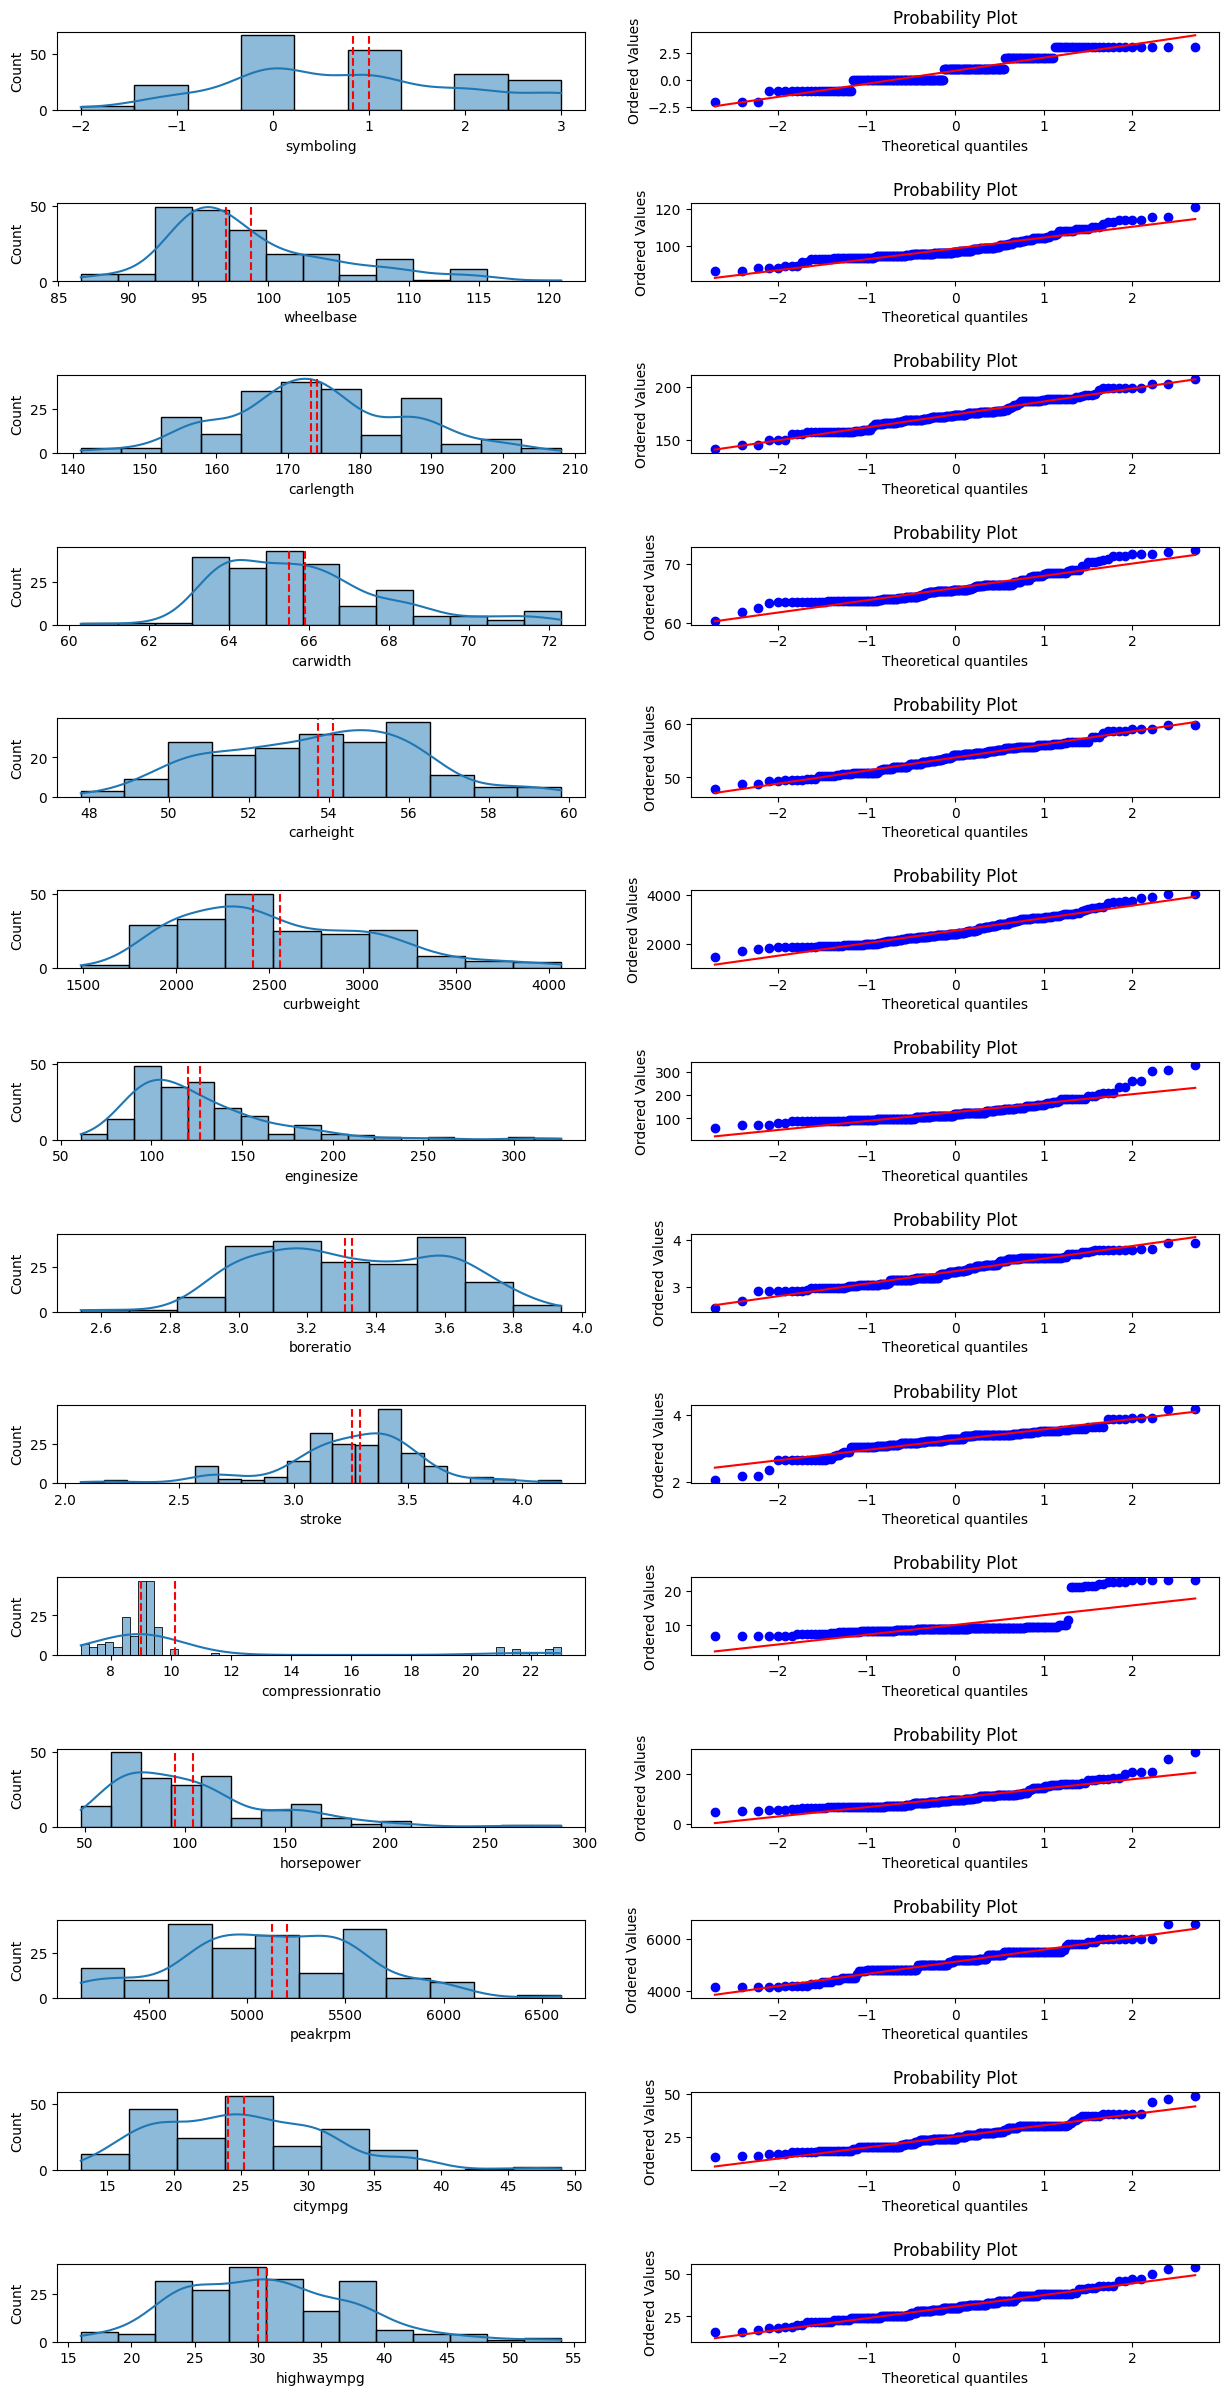

In [97]:
from scipy import stats

fig, ax = plt.subplots(nrows=14, ncols=2, figsize=(15,30))

for i, column in enumerate(list(num_only_df.columns[:14])):
    # Histogram with Kernel Density Estimation
    sns.histplot(x=num_only_df[column], ax=ax[i,0], kde=True)

    # Central Tendency Lines
    ax[i,0].axvline(num_only_df[column].mean(), color='red', linestyle='--')
    ax[i,0].axvline(num_only_df[column].median(), color='red', linestyle='--')

    # Q-Q Plot
    stats.probplot(num_only_df[column], dist="norm", plot=ax[i,1])

plt.subplots_adjust(hspace=1.2)
plt.show()

Using Pearson Correlation, we will figure out the relationships between each numerical variable and `price`.

In [30]:
from scipy.stats import pearsonr

data = {
    'column': [],
    'Pearson Correlation': [],
    'P-value': []
}

for column in list(num_only_df.columns):
    pearson_coef, p_value = pearsonr(df[column], df['price'])
    data['column'].append(column)
    data['Pearson Correlation'].append(pearson_coef)
    data['P-value'].append(p_value)

corr_display = pd.DataFrame(data)
corr_display

,column,Pearson Correlation,P-value
0,symboling,-0.079978,2.543118e-01
1,wheelbase,0.577816,1.182820e-19
2,carlength,0.682920,1.678707e-29
3,carwidth,0.759325,9.627438e-40
4,carheight,0.119336,8.832832e-02
5,curbweight,0.835305,1.214445e-54
6,enginesize,0.874145,1.354764e-65
7,boreratio,0.553173,7.907922e-18
8,stroke,0.079443,2.575137e-01
9,compressionratio,0.067984,3.327724e-01


In [24]:
num_only_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0
